# Import Libraries

In [1]:
import pandas as pd
import json

# Load the dataset

In [3]:
# Define the path to the dataset directory
goemotions_path = "Documents/Python_Projects/EmotionDetection/GoEmotions.ipynb"

# Load the training data
train_df = pd.read_csv(f"{goemotions_path}/train.tsv", delimiter="\t", header=None, names=["Comment", "Class", "Delete"])
# Load the test data
test_df = pd.read_csv(f"{goemotions_path}/test.tsv", delimiter="\t", header=None, names=["Comment", "Class", "Delete"])
# Load the validation data
validation_df = pd.read_csv(f"{goemotions_path}/dev.tsv", delimiter="\t", header=None, names=["Comment", "Class", "Delete"])

FileNotFoundError: [Errno 2] No such file or directory: 'Documents/Python_Projects/EmotionDetection/GoEmotions.ipynb/train.tsv'

GoEmotions is a dataset with 58000 Reddit comments labeled with 28 emotions:

admiration, amusement, anger, annoyance, approval, caring, confusion, curiosity, desire, disappointment, disapproval, disgust, embarrassment, excitement, fear, gratitude, grief, joy, love, nervousness, optimism, pride, realization, relief, remorse, sadness, surprise + neutral

In [4]:
train_df 

,Comment,Class,Delete
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj
...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,18,edsb738
43406,Always thought that was funny but is it a refe...,6,ee7fdou
43407,What are you talking about? Anything bad that ...,3,efgbhks
43408,"More like a baptism, with sexy results!",13,ed1naf8


In [14]:
# dropping the "Delete" column
train_data = train_df.drop("Delete", axis=1)
test_data = test_df.drop("Delete", axis=1)
val_data = validation_df.drop("Delete", axis=1)

In [6]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(43410, 2)
(5427, 2)
(5426, 2)


In [7]:
train_data.head()

,Comment,Class
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2
3,To make her feel threatened,14
4,Dirty Southern Wankers,3


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  43410 non-null  object
 1   Class    43410 non-null  object
dtypes: object(2)
memory usage: 678.4+ KB


# Multiple Emotion Labels:
In the dataset, some comments are associated with multiple emotion labels, which are separated by commas in the "Class" column. To handle this, we create a "Class list" column by splitting the "Class" column string values into lists. This allows us to treat each comment's multiple labels as a list of labels, making it easier to analyze and manipulate the data.

In [15]:
# Create a new column "Class list" by splitting the "Class" column strings at each comma
train_df["Class list"] = train_df["Class"].apply(lambda x: x.split(","))
# Create a new column "Class len" that contains the length of each list in the "Class list" column
train_df["Class len"] = train_df["Class list"].apply(lambda x: len(x))

# Repeat the same process for the test data
test_df["Class list"] = test_df["Class"].apply(lambda x: x.split(","))
test_df["Class len"] = test_df["Class list"].apply(lambda x: len(x))

# Repeat the same process for the validation data
validation_df["Class list"] = validation_df["Class"].apply(lambda x: x.split(","))
validation_df["Class len"] = validation_df["Class list"].apply(lambda x: len(x))

In [16]:
# Filter rows where "Class len" is greater than 1
train_multiple_emotions = train_df[train_df["Class len"] > 1]
test_multiple_emotions = test_df[test_df["Class len"] > 1]
validation_multiple_emotions = validation_df[validation_df["Class len"] > 1]

In [17]:
# Display the rows with multiple emotion labels in the training data
print("Training Data - Rows with Multiple Emotion Labels:")
print(train_multiple_emotions)

Training Data - Rows with Multiple Emotion Labels:
                                                 Comment   Class   Delete  \
7      We need more boards and to create a bit more s...    8,20  ef4qmod   
11     Aww... she'll probably come around eventually,...     1,4  edex4ki   
15     Shit, I guess I accidentally bought a Pay-Per-...    3,12  edivtm3   
19     Maybe that’s what happened to the great white ...    6,22  eczq8zg   
20     I never thought it was at the same moment, but...  6,9,27  efdlhs1   
...                                                  ...     ...      ...   
43382   goat handshake denied Personally, I just thin...   14,27  ef2m53x   
43383                                     it's horrid :/   14,27  edlbr3j   
43388  Fuck these trendy hipster joints. Give me my s...     2,3  ee3nyiy   
43395  Sorry I kind of took it like you were flexing ...    1,24  eelhhzc   
43404  Your paranoia over it seems schizophrenic to m...    7,27  ef8ymm9   

       Class list  Class

In [18]:
# Display the rows with multiple emotion labels in the test data
print("\nTest Data - Rows with Multiple Emotion Labels:")
print(test_multiple_emotions)


Test Data - Rows with Multiple Emotion Labels:
                                                Comment  Class   Delete  \
10    [NAME] has towed the line of the Dark Side. He...   3,10  eeaf7fg   
11            Lol! But I love your last name though. XD   1,18  ee3yyz3   
13    It's great that you're a recovering addict, th...    0,7  eeccgbb   
17    if the pain doesn't go away after 4 hours or s...  25,27  eezp1cd   
24    Watch Vegan Gains’ video on that, he had it wh...   6,27  ednoz16   
...                                                 ...    ...      ...   
5404  Hahaha so I’m no longer going to worry about i...   1,20  eevy72t   
5413  This will be me a year from now. Not fair at all.  10,12  eebo774   
5414  I know, right?! I was literally in tears Satur...   7,25  eepx8q5   
5415            They are children, they have no souls.     4,5  eeqrhdo   
5419  My mom works for Nasa and apparently no. They ...   1,11  edklt4j   

     Class list  Class len  
10      [3, 10]       

In [19]:
# Display the rows with multiple emotion labels in the validation data
print("\nValidation Data - Rows with Multiple Emotion Labels:")
print(validation_multiple_emotions)


Validation Data - Rows with Multiple Emotion Labels:
                                                Comment   Class   Delete  \
1     You know the answer man, you are programmed to...    4,27  ee84bjg   
3     The economy is heavily controlled and subsidiz...    4,27  edc32e2   
11    I went to a destination wedding being the only...   12,22  eczyj0h   
14    Lol dream on buddy. You’ve had enough attentio...  1,3,25  ed2znun   
15    As an anesthesia resident this made me blow ai...     2,3  ee2piwu   
...                                                 ...     ...      ...   
5395  Great cover of my favorite song. I loved watch...    0,18  edwugs8   
5399                                   Damn this got me    3,27  ef18buu   
5401                                  cool... Sorry bro   24,25  ee3v5ip   
5405       Very very nice to see this irl. Nice post 👌🏼     0,4  eddgqs7   
5413  Yup! She was also on a show called Queen Bees ...     4,7  efak8me   

      Class list  Class len  
1  

# Ekman’s Basic Emotions:
As mentioned above, GoEmotions uses 27 emotions to annotate Reddit comments. We are going to map these emotions to Ekman's 6 basic emotion categories: joy, anger, fear, sadness, disgust, and surprise

In [25]:
# Load the Ekman mapping JSON file
with open("Documents/Python_Projects/EmotionDetection/MainProject/ekman_mapping.json") as file:
    ekman_mapping = json.load(file)

# Display the loaded JSON data
print(ekman_mapping)

{'anger': ['anger', 'annoyance', 'disapproval'], 'disgust': ['disgust'], 'fear': ['fear', 'nervousness'], 'joy': ['joy', 'amusement', 'approval', 'excitement', 'gratitude', 'love', 'optimism', 'relief', 'pride', 'admiration', 'desire', 'caring'], 'sadness': ['sadness', 'disappointment', 'embarrassment', 'grief', 'remorse'], 'surprise': ['surprise', 'realization', 'confusion', 'curiosity']}


In [26]:
emotion_file = open("Documents/Python_Projects/EmotionDetection/MainProject/emotions.txt", "r")
emotion_list = emotion_file.read()
emotion_list = emotion_list.split("\n")
print(emotion_list)
print(len(emotion_list))

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
28


In [27]:
def idx2class(idxlist):
    arr = []
    for i in idxlist:
        arr.append(emotion_list[int(i)])
    return arr

In [28]:
# Converting the class indexes back to class names
train_data["Emotion"] = train_data["Class list"].apply(idx2class)
test_data["Emotion"] = test_data["Class list"].apply(idx2class)
val_data["Emotion"] = val_data["Class list"].apply(idx2class)

In [29]:
def EmotionMapping(emotion_list):
    map_list = []
    
    for i in emotion_list:
        if i in ekman_mapping["anger"]:
            map_list.append("anger")
        if i in ekman_mapping["disgust"]:
            map_list.append("disgust")
        if i in ekman_mapping["fear"]:
            map_list.append("fear")
        if i in ekman_mapping["joy"]:
            map_list.append("joy")
        if i in ekman_mapping["sadness"]:
            map_list.append("sadness")
        if i in ekman_mapping["surprise"]:
            map_list.append("surprise")
        if i == "neutral":
            map_list.append("neutral")
            
    return map_list

In [30]:
# Convert the classes based on Ekman Taxonomy
train_data["Mapped_emotion"] = train_data["Emotion"].apply(EmotionMapping)
test_data["Mapped_emotion"] = test_data["Emotion"].apply(EmotionMapping)
val_data["Mapped_emotion"] = val_data["Emotion"].apply(EmotionMapping)

In [31]:
train_data["Mapped_emotion"] = train_data["Mapped_emotion"].apply(lambda x: ','.join(x))
test_data["Mapped_emotion"] = test_data["Mapped_emotion"].apply(lambda x: ','.join(x))
val_data["Mapped_emotion"] = val_data["Mapped_emotion"].apply(lambda x: ','.join(x))

In [32]:
train_data = train_data.drop(["Class", "Class list", "Class len", "Emotion"], axis=1)
test_data = test_data.drop(["Class", "Class list", "Class len", "Emotion"], axis=1)
val_data = val_data.drop(["Class", "Class list", "Class len", "Emotion"], axis=1)

In [33]:
train_data_1= train_data["Mapped_emotion"].str.split(",", expand=True)
test_data_1= test_data["Mapped_emotion"].str.split(",", expand=True)
val_data_1= val_data["Mapped_emotion"].str.split(",", expand=True)

In [34]:
train_data_1.drop(train_data_1.columns[1:5], axis=1, inplace=True)
test_data_1.drop(test_data_1.columns[1:5], axis=1, inplace=True)
val_data_1.drop(val_data_1.columns[1:5], axis=1, inplace=True)

In [35]:
train_data = pd.concat([train_data, train_data_1], axis=1)
test_data = pd.concat([test_data, test_data_1], axis=1)
val_data = pd.concat([val_data, val_data_1], axis=1)

In [36]:
train_data.rename(columns={0: "Emotion"}, inplace=True)
test_data.rename(columns={0: "Emotion"}, inplace=True)
val_data.rename(columns={0: "Emotion"}, inplace=True)

In [37]:
train_data = train_data.drop(["Mapped_emotion"], axis=1)
test_data = test_data.drop(["Mapped_emotion"], axis=1)
val_data = val_data.drop(["Mapped_emotion"], axis=1)

In [38]:
#Checking if the data is balanced or not
train_data.Emotion.value_counts()

Emotion
joy         16948
neutral     12823
anger        5336
surprise     4489
sadness      2619
fear          615
disgust       580
Name: count, dtype: int64

In [39]:
train_data.head()

,Comment,Emotion
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger


In [40]:
#Removing Duplicated values
index = train_data[train_data.duplicated() == True].index
train_data.drop(index, axis=0, inplace=True)
train_data.reset_index(inplace=True, drop=True)

index = test_data[test_data.duplicated() == True].index
test_data.drop(index, axis=0, inplace=True)
test_data.reset_index(inplace=True, drop=True)

index = val_data[val_data.duplicated() == True].index
val_data.drop(index, axis=0, inplace=True)
val_data.reset_index(inplace=True, drop=True)

In [41]:
#print rows which are duplicated in the text but the same emotion
train_data[train_data["Comment"].duplicated() == True]

,Comment,Emotion
6610,My man!,joy
7925,What do you mean?,surprise
8344,Weird flex but okay,joy
8978,[NAME],neutral
9375,Grow up.,anger
9481,Weird flex but ok,disgust
14012,You're welcome,neutral
14104,This is horrible,fear
15809,Lol no.,joy
20768,Oh boy yeah,joy


In [42]:
#print rows which are duplicated in the text but the same emotion
test_data[test_data["Comment"].duplicated() == True]

,Comment,Emotion


In [43]:
#print rows which are duplicated in the text but the same emotion
test_data[test_data["Comment"].duplicated() == True]

,Comment,Emotion


In [44]:
# Removing the duplicate text
index = train_data[train_data["Comment"].duplicated() == True].index
train_data.drop(index, axis=0, inplace = True)
train_data.reset_index(inplace=True, drop=True)

In [45]:
val_data = val_data.drop([22, 23])

In [46]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

In [70]:
import os
import matplotlib.pyplot as plt
import re
import string
import json
import numpy as np
import pandas as pd
from sklearn import metrics
from bs4 import BeautifulSoup
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, AutoTokenizer, BertModel, BertConfig, AutoModel, AdamW
import warnings
warnings.filterwarnings('ignore')

In [71]:
import re
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub(r'\:(.*?)\:','',text)
    text = str(text).lower()    #Making Text Lowercase
    text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",", "'")
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''   
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

def correct_spelling(x, dic):
    '''Corrects common spelling errors'''   
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
    text = clean_text(text)
    text = clean_contractions(text, contraction_mapping)
    text = clean_special_chars(text, punct, punct_mapping)
    text = correct_spelling(text, mispell_dict)
    text = remove_space(text)
    return text

In [72]:
train_data['Comment'] = train_data['Comment'].apply(text_preprocessing_pipeline)
val_data['Comment'] = val_data['Comment'].apply(text_preprocessing_pipeline)

In [73]:
train_data['Comment']

0        my favorite food is anything i did not have to...
1        now if he does off himself everyone will think...
2                           why the fuck is bayless isoing
3                              to make her feel threatened
4                                   dirty southern wankers
                               ...                        
43222    added you mate well i ve just got the bow and ...
43223    always thought that was funny but is it a refe...
43224    what are you talking about anything bad that h...
43225                more like a baptism with sexy results
43226                                       enjoy the ride
Name: Comment, Length: 43227, dtype: object

In [75]:
train_data

,Comment,Emotion
0,my favorite food is anything i did not have to...,neutral
1,now if he does off himself everyone will think...,neutral
2,why the fuck is bayless isoing,anger
3,to make her feel threatened,fear
4,dirty southern wankers,anger
...,...,...
43222,added you mate well i ve just got the bow and ...,joy
43223,always thought that was funny but is it a refe...,surprise
43224,what are you talking about anything bad that h...,anger
43225,more like a baptism with sexy results,joy


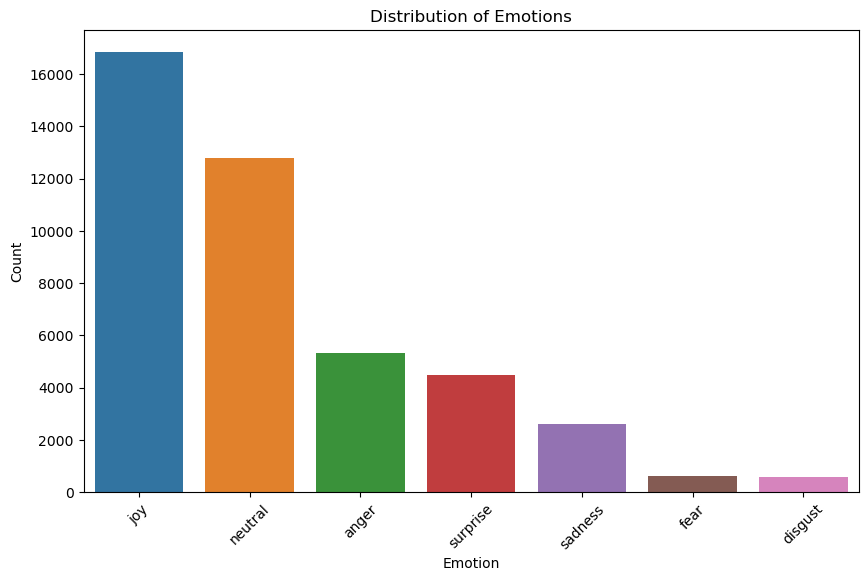

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=train_data, order=train_data['Emotion'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

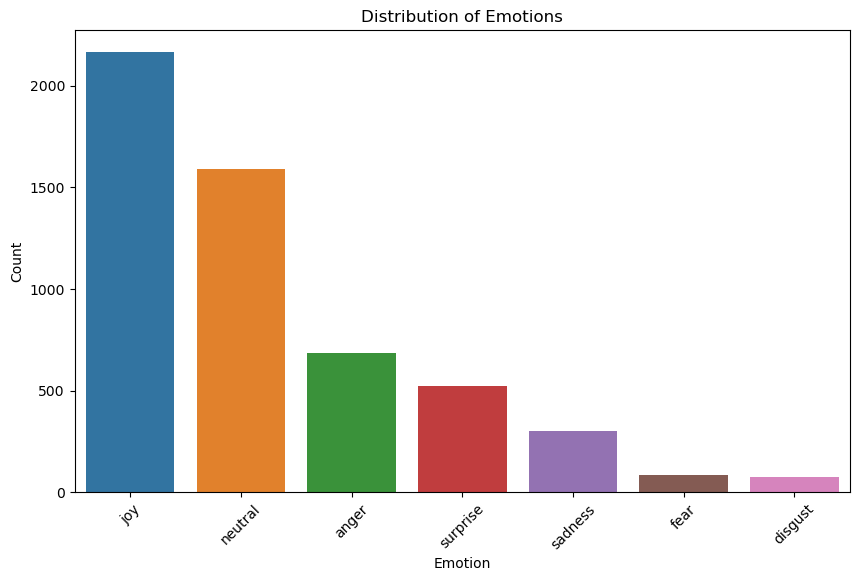

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=val_data, order=val_data['Emotion'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

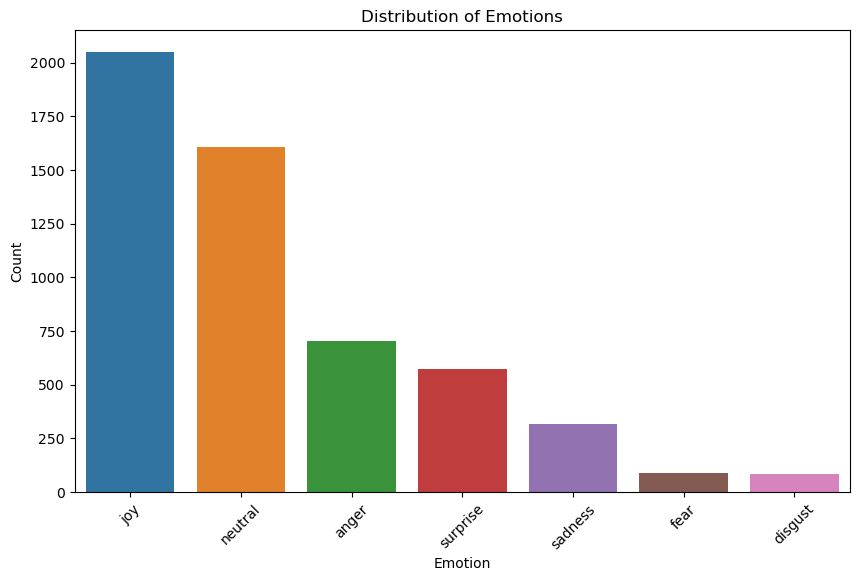

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=test_data, order=test_data['Emotion'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [77]:
# another approach!!


def preprocess(sentence):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    sentence = re.sub('[^A-z]', ' ', sentence)
    negative = ['not', 'neither', 'nor', 'but', 'however', 'although', 'nonetheless', 'despite', 'except',
                        'even though', 'yet']
    stop_words = [z for z in stop_words if z not in negative]
    preprocessed_tokens = [lemmatizer.lemmatize(contractions.fix(temp.lower())) for temp in sentence.split() if temp not in stop_words] #lemmatization
    return ' '.join([x for x in preprocessed_tokens]).strip()

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
    text = preprocess(text)
    return text

train_data['Text'] = train_data['Text'].apply(lambda x: preprocess(x))
valid_data["Text"] = valid_data["Text"].apply(lambda x: preprocess(x))
test_data["Text"] = test_data["Text"].apply(text_preprocessing_pipeline)

KeyError: 'Text'